In [ ]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from qiskit.circuit.library import ZZFeatureMap
from qiskit_aer import AerSimulator
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import FidelityQuantumKernel

# Placeholder for QGA implementation
class QuantumGeneticAlgorithm:
    def __init__(self, population_size=20, generations=10):
        self.population_size = population_size
        self.generations = generations

    def fit(self, X, y):
        # Placeholder: Implement QGA logic for feature selection
        # Return selected features indices
        num_features = X.shape[1]
        return np.arange(num_features)  # Return all features for now

# Load the .mat file
data = scipy.io.loadmat('data/data/BCIC_data/Extracted_Features/Features_B01_11.mat')

# Extract features and labels
X = data['input']   # Replace 'input' with the correct variable name if different
y = data['target']  # Replace 'target' with the correct variable name if different

# Convert complex values to real if necessary
X = np.real(X)

# Normalize the feature matrix
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Ensure labels are a 1D array
y = y.flatten()

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=50)  # Adjust the number of components as needed
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)  # Transform test data with the same PCA

# Apply QGA for feature selection
qga = QuantumGeneticAlgorithm(population_size=20, generations=10)
selected_features_indices_qga = qga.fit(X_train_reduced, y_train)

# Select features
X_train_reduced_selected = X_train_reduced[:, selected_features_indices_qga]
X_test_reduced_selected = X_test_reduced[:, selected_features_indices_qga]

# Define and train SVM model
svm_model = SVC(kernel='linear', class_weight='balanced')
svm_model.fit(X_train_reduced_selected, y_train)

# Predict with SVM
svm_predicted_labels = svm_model.predict(X_test_reduced_selected)

# Evaluate SVM model
svm_accuracy = accuracy_score(y_test, svm_predicted_labels)
svm_report = classification_report(y_test, svm_predicted_labels)

print(f'SVM Accuracy: {svm_accuracy * 100:.2f}%')
print(f'SVM Classification Report:\n{svm_report}')

# Define and train XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_reduced_selected, y_train)

# Predict with XGBoost
xgb_predicted_labels = xgb_model.predict(X_test_reduced_selected)

# Evaluate XGBoost model
xgb_accuracy = accuracy_score(y_test, xgb_predicted_labels)
xgb_report = classification_report(y_test, xgb_predicted_labels)

print(f'XGBoost Accuracy: {xgb_accuracy * 100:.2f}%')
print(f'XGBoost Classification Report:\n{xgb_report}')

# Define quantum feature map
feature_map = ZZFeatureMap(feature_dimension=X_train_reduced_selected.shape[1], entanglement='linear')

# Initialize the quantum backend
simulator = AerSimulator()

# Define the quantum kernel
quantum_kernel = FidelityQuantumKernel(feature_map=feature_map)

# Initialize QSVC
qsvc = QSVC(quantum_kernel=quantum_kernel)

# Train the QSVC
qsvc.fit(X_train_reduced_selected, y_train)

# Predict on test data
qsvc_predicted_labels = qsvc.predict(X_test_reduced_selected)

# Evaluate QSVC model
qsvc_accuracy = accuracy_score(y_test, qsvc_predicted_labels)
qsvc_report = classification_report(y_test, qsvc_predicted_labels)

print(f'QSVC Accuracy: {qsvc_accuracy * 100:.2f}%')
print(f'QSVC Classification Report:\n{qsvc_report}')


SVM Accuracy: 76.39%
SVM Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.75      0.75        68
         1.0       0.78      0.78      0.78        76

    accuracy                           0.76       144
   macro avg       0.76      0.76      0.76       144
weighted avg       0.76      0.76      0.76       144



/opt/conda/envs/cuquantum-24.03/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [01:29:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 75.00%
XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.76      0.74        68
         1.0       0.78      0.74      0.76        76

    accuracy                           0.75       144
   macro avg       0.75      0.75      0.75       144
weighted avg       0.75      0.75      0.75       144



Shape of X_tsne: (287, 2)


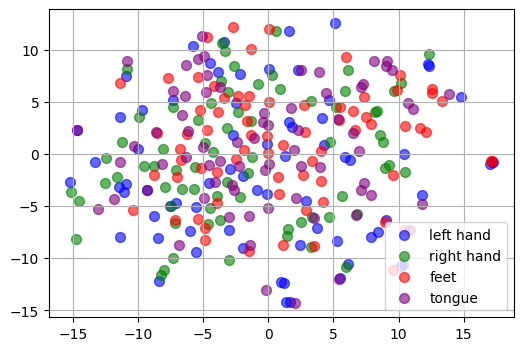

In [13]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Load data from .mat file
data = scipy.io.loadmat('data/BCICIV_2a_gdf/processed_features_vmd/combined_features_labels.mat')

# Extract features and labels
X = data['features']   # Correct variable name for features
y = data['labels']     # Correct variable name for labels

# Convert complex values to real if necessary
X = np.real(X)

# Flatten the feature matrix and normalize
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_normalized)

# Check the shape of X_tsne to ensure it is 2D
print(f'Shape of X_tsne: {X_tsne.shape}')

# Plotting
plt.figure(figsize=(6, 4))

# Define colors and labels for the classes
colors = ['blue', 'green', 'red', 'purple']
class_labels = ['left hand', 'right hand', 'feet', 'tongue']  # Define labels corresponding to class numbers

# Plot each class
for i, label in enumerate(np.unique(y)):
    plt.scatter(X_tsne[y.flatten() == label, 0], X_tsne[y.flatten() == label, 1], 
                color=colors[i], 
                label=class_labels[i], 
                alpha=0.6, 
                s=50)

plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.grid(True)

# Save the plot with 300 dpi
plt.savefig('tsne_visualization.png', dpi=300)

# Show the plot
plt.show()


In [12]:
import numpy as np
import os
import mne
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define paths
gdf_path = 'data/BCICIV_2a_gdf/A01T.gdf'
output_dir = 'output/t1'

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Load the BCI-IV 2a dataset
raw = mne.io.read_raw_gdf(gdf_path, preload=True)
raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])

# Extract epochs and labels
event_id = {'769': 7, '770': 8, '771': 9, '772': 10}
events, _ = mne.events_from_annotations(raw, event_id=event_id)
tmin, tmax = 1.5, 6
epochs = mne.Epochs(raw, events, event_id=event_id, tmin=tmin, tmax=tmax, baseline=None, detrend=1, reject_by_annotation=True)

# Get data and labels
X = epochs.get_data()  # Shape should be (n_epochs, n_channels, n_times)
y = epochs.events[:, 2]  # Extract labels

# Flatten the data for SVM fitting
n_epochs, n_channels, n_times = X.shape
X_flattened = X.reshape(n_epochs, n_channels * n_times)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_flattened)

# Split data for feature selection
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train a linear SVM to identify best channels
clf = SVC(kernel='linear', random_state=42)
clf.fit(X_train, y_train)

# Compute feature importances using the absolute sum of coefficients
coef_abs_sum = np.sum(np.abs(clf.coef_), axis=0)
channel_importance = np.sum(coef_abs_sum.reshape(n_channels, n_times), axis=1)
best_channels = np.argsort(channel_importance)[-3:]  # Get indices of top 3 channels

print(f"Best channels: {best_channels}")

# Select only the best channels from the data
X_best_channels = X[:, best_channels, :]  # Shape: (n_epochs, 3, n_times)


Extracting EDF parameters from /work/data/BCICIV_2a_gdf/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


/opt/conda/envs/cuquantum-24.03/lib/python3.10/contextlib.py:142: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Best channels: [ 6 12 21]


In [66]:
# Apply Butterworth bandpass filter
raw_filtered = raw.copy().pick_channels([raw.ch_names[i] for i in best_channels])
raw_filtered.filter(l_freq=0.5, h_freq=35, picks='all')

# Extract filtered epochs
epochs_filtered = mne.Epochs(raw_filtered, events, event_id=event_id, tmin=tmin, tmax=tmax, baseline=None, detrend=1)
X_filtered = epochs_filtered.get_data()  # Shape should be (n_epochs, 3, n_times)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 1651 samples (6.604 s)

Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped


In [7]:
import numpy as np
from scipy.stats import skew, kurtosis
from scipy.signal import welch

def hjorth_features(signal):
    """Compute Hjorth Mobility and Complexity."""
    diff = np.diff(signal)
    mobility = np.sqrt(np.var(diff) / np.var(signal)) if np.var(signal) != 0 else 0
    complexity = np.sqrt(np.var(np.diff(diff)) / np.var(diff) / (mobility ** 2)) if np.var(diff) != 0 and mobility != 0 else 0
    return mobility, complexity

def extract_features_vmd(data, num_modes=5):
    """Extract features from VMD decomposition."""
    features = []
    for epoch in data:
        for mode in epoch:
            # Compute statistical features
            mean = np.mean(mode)
            std = np.std(mode)
            mobility, complexity = hjorth_features(mode)
            skewness = skew(mode)
            kurt = kurtosis(mode)
            first_diff = np.mean(np.diff(mode))
            coef_of_var = std / mean if mean != 0 else 0

            # Compute PSD and extract maximum values for specified frequency bands
            freqs, psd = welch(mode, nperseg=250, fs=250)  # Adjust fs and nperseg as needed
            max_psd_1_4 = np.max(psd[(freqs >= 1) & (freqs <= 4)]) if np.any((freqs >= 1) & (freqs <= 4)) else 0
            max_psd_4_8 = np.max(psd[(freqs >= 4) & (freqs <= 8)]) if np.any((freqs >= 4) & (freqs <= 8)) else 0
            max_psd_8_12 = np.max(psd[(freqs >= 8) & (freqs <= 12)]) if np.any((freqs >= 8) & (freqs <= 12)) else 0

            features.append([mean, std, mobility, complexity, skewness, kurt, first_diff, coef_of_var, max_psd_1_4, max_psd_4_8, max_psd_8_12])
    return np.array(features)

# Define or load X_vmd
num_epochs = 288
num_modes = 5
num_samples_per_mode = 2252

# Placeholder data
X_vmd = np.random.rand(num_epochs, num_modes, num_samples_per_mode)

# Extract features
features_vmd = extract_features_vmd(X_vmd)

# Flatten the features if needed for ML models
num_epochs = X_vmd.shape[0]
num_features_per_epoch = features_vmd.shape[1]
X_flattened = features_vmd.reshape(num_epochs, -1)  # Flatten features for each epoch

print(f"Features shape after flattening: {X_flattened.shape}")

# Save extracted features
np.save('features_vmd.npy', X_flattened)


Features shape after flattening: (288, 55)


In [13]:
import numpy as np
import os
import mne
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define paths
gdf_path = 'data/BCICIV_2a_gdf/A01T.gdf'
output_dir = 'output/t1'

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Load the BCI-IV 2a dataset
raw = mne.io.read_raw_gdf(gdf_path, preload=True)
raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])

# Extract epochs and labels
event_id = {'769': 7, '770': 8, '771': 9, '772': 10}
events, _ = mne.events_from_annotations(raw, event_id=event_id)
tmin, tmax = 1.5, 6
epochs = mne.Epochs(raw, events, event_id=event_id, tmin=tmin, tmax=tmax, baseline=None, detrend=1, reject_by_annotation=True)

# Get data and labels
X = epochs.get_data()  # Shape should be (n_epochs, n_channels, n_times)
y = epochs.events[:, 2]  # Extract labels

# Flatten the data for SVM fitting
n_epochs, n_channels, n_times = X.shape
X_flattened = X.reshape(n_epochs, n_channels * n_times)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_flattened)

# Split data for feature selection
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train a linear SVM to identify best channels
clf = SVC(kernel='linear', random_state=42)
clf.fit(X_train, y_train)

# Compute feature importances using the absolute sum of coefficients
coef_abs_sum = np.sum(np.abs(clf.coef_), axis=0)
channel_importance = np.sum(coef_abs_sum.reshape(n_channels, n_times), axis=1)
best_channels = np.argsort(channel_importance)[-3:]  # Get indices of top 3 channels

print(f"Best channels: {best_channels}")

# Select only the best channels from the data
# Note: Since we're working with flattened data, we need to reshape it back
# to its original shape and select the channels before flattening for SVM

# Recreate the original data shape (excluding filtering step)
X_best_channels = X[:, best_channels, :]  # Shape: (n_epochs, 3, n_times)

# Reshape X_best_channels for SVM
X_best_channels_flattened = X_best_channels.reshape(n_epochs, len(best_channels) * n_times)

# Standardize the features again
X_best_channels_scaled = scaler.fit_transform(X_best_channels_flattened)

# Split data for SVM training and testing
X_train_best, X_test_best, y_train_best, y_test_best = train_test_split(X_best_channels_scaled, y, test_size=0.3, random_state=42)

# Train SVM on the selected channels
clf_best = SVC(kernel='linear', random_state=42)
clf_best.fit(X_train_best, y_train_best)

# Evaluate the SVM model
y_pred_best = clf_best.predict(X_test_best)
accuracy_best = accuracy_score(y_test_best, y_pred_best)

print(f"SVM Accuracy with selected channels: {accuracy_best:.2f}")

# Save the processed data and labels
np.save(os.path.join(output_dir, 'X_best_channels.npy'), X_best_channels)
np.save(os.path.join(output_dir, 'y.npy'), y)


Extracting EDF parameters from /work/data/BCICIV_2a_gdf/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


/opt/conda/envs/cuquantum-24.03/lib/python3.10/contextlib.py:142: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Best channels: [ 6 12 21]
SVM Accuracy with selected channels: 0.32


In [19]:
import numpy as np
import os
import mne
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.signal import butter, filtfilt

# Define paths
gdf_path = 'data/BCICIV_2a_gdf/A01T.gdf'
output_dir = 'output/t1'

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Load the BCI-IV 2a dataset
raw = mne.io.read_raw_gdf(gdf_path, preload=True)
raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])

# Extract epochs and labels
event_id = {'769': 7, '770': 8, '771': 9, '772': 10}
events, _ = mne.events_from_annotations(raw, event_id=event_id)
tmin, tmax = 1.5, 6
epochs = mne.Epochs(raw, events, event_id=event_id, tmin=tmin, tmax=tmax, baseline=None, detrend=1, reject_by_annotation=True)

# Get data and labels
X = epochs.get_data()  # Shape should be (n_epochs, n_channels, n_times)
y = epochs.events[:, 2]  # Extract labels

# Flatten the data for SVM fitting
n_epochs, n_channels, n_times = X.shape
X_flattened = X.reshape(n_epochs, n_channels * n_times)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_flattened)

# Split data for feature selection
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train a linear SVM to identify best channels
clf = SVC(kernel='linear', random_state=42)
clf.fit(X_train, y_train)

# Compute feature importances using the absolute sum of coefficients
coef_abs_sum = np.sum(np.abs(clf.coef_), axis=0)
channel_importance = np.sum(coef_abs_sum.reshape(n_channels, n_times), axis=1)
best_channels = np.argsort(channel_importance)[-3:]  # Get indices of top 3 channels

print(f"Best channels: {best_channels}")

# Select only the best channels from the data
X_best_channels = X[:, best_channels, :]  # Shape: (n_epochs, 3, n_times)

# Apply Butterworth bandpass filter
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    """Apply a Butterworth bandpass filter."""
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data, axis=-1)

# Apply the bandpass filter
fs = raw.info['sfreq']  # Sampling frequency
X_filtered = np.zeros_like(X_best_channels)  # Initialize array for filtered data
for i in range(X_best_channels.shape[0]):
    X_filtered[i] = butter_bandpass_filter(X_best_channels[i], 0.5, 41, fs)

# Save the filtered data and labels
np.save(os.path.join(output_dir, 'X_filtered.npy'), X_filtered)
np.save(os.path.join(output_dir, 'y.npy'), y)

# Reshape filtered data for SVM
X_filtered_flattened = X_filtered.reshape(n_epochs, len(best_channels) * n_times)

# Standardize the filtered features
X_filtered_scaled = scaler.fit_transform(X_filtered_flattened)

# Split data for SVM training and testing
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered_scaled, y, test_size=0.3, random_state=42)

# Train SVM on the filtered data
clf_filtered = SVC(kernel='linear', random_state=42)
clf_filtered.fit(X_train_filtered, y_train_filtered)

# Evaluate the SVM model
y_pred_filtered = clf_filtered.predict(X_test_filtered)
accuracy_filtered = accuracy_score(y_test_filtered, y_pred_filtered)

print(f"SVM Accuracy with filtered data: {accuracy_filtered:.2f}")


Extracting EDF parameters from /work/data/BCICIV_2a_gdf/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


/opt/conda/envs/cuquantum-24.03/lib/python3.10/contextlib.py:142: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Best channels: [ 6 12 21]
SVM Accuracy with filtered data: 0.32


In [24]:
import numpy as np
import os
import mne
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.signal import butter, filtfilt
from scipy.stats import skew, kurtosis
from scipy.signal import welch
from vmdpy import VMD

# Define paths
gdf_path = 'data/BCICIV_2a_gdf/A01T.gdf'
output_dir = 'output/t1'
vmd_output_dir = 'output/vmd_features'

# Create output directories if they don't exist
os.makedirs(output_dir, exist_ok=True)
os.makedirs(vmd_output_dir, exist_ok=True)

# Load the BCI-IV 2a dataset
raw = mne.io.read_raw_gdf(gdf_path, preload=True)
raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])

# Extract epochs and labels
event_id = {'769': 7, '770': 8, '771': 9, '772': 10}
events, _ = mne.events_from_annotations(raw, event_id=event_id)
tmin, tmax = 1.5, 6
epochs = mne.Epochs(raw, events, event_id=event_id, tmin=tmin, tmax=tmax, baseline=None, detrend=1, reject_by_annotation=True)

# Get data and labels
X = epochs.get_data()  # Shape should be (n_epochs, n_channels, n_times)
y = epochs.events[:, 2]  # Extract labels

# Flatten the data for SVM fitting
n_epochs, n_channels, n_times = X.shape
X_flattened = X.reshape(n_epochs, n_channels * n_times)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_flattened)

# Split data for feature selection
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train a linear SVM to identify best channels
clf = SVC(kernel='linear', random_state=42)
clf.fit(X_train, y_train)

# Compute feature importances using the absolute sum of coefficients
coef_abs_sum = np.sum(np.abs(clf.coef_), axis=0)
channel_importance = np.sum(coef_abs_sum.reshape(n_channels, n_times), axis=1)
best_channels = np.argsort(channel_importance)[-3:]  # Get indices of top 3 channels

print(f"Best channels: {best_channels}")

# Select only the best channels from the data
X_best_channels = X[:, best_channels, :]  # Shape: (n_epochs, 3, n_times)

# Apply Butterworth bandpass filter
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    """Apply a Butterworth bandpass filter."""
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data, axis=-1)

# Apply the bandpass filter
fs = raw.info['sfreq']  # Sampling frequency
X_filtered = np.zeros_like(X_best_channels)  # Initialize array for filtered data
for i in range(X_best_channels.shape[0]):
    X_filtered[i] = butter_bandpass_filter(X_best_channels[i], 0.5, 35, fs)

# Define VMD function using vmdpy
def vmd(signal, num_modes=5, alpha=2000, tau=0., DC=False, init=None, tol=1e-6):
    """Apply Variational Mode Decomposition (VMD)."""
    vmd_instance = VMD(signal, alpha=alpha, tau=tau, K=num_modes, DC=DC, init=init, tol=tol)
    modes = vmd_instance[0]  # Extract modes from tuple
    return modes

# Extract features from VMD decomposition
def extract_features_vmd(data, num_modes=5):
    """Extract features from VMD decomposition."""
    features = {f'mode_{i+1}': [] for i in range(num_modes)}
    for epoch in data:
        # Apply VMD
        vmd_modes = vmd(epoch, num_modes=num_modes)  # Apply VMD to each epoch
        for i, mode in enumerate(vmd_modes):
            # Compute statistical features
            mean = np.mean(mode)
            std = np.std(mode)
            skewness = skew(mode)
            kurt = kurtosis(mode)
            first_diff = np.mean(np.diff(mode))
            coef_of_var = std / mean if mean != 0 else 0

            # Compute PSD and extract maximum values for specified frequency bands
            freqs, psd = welch(mode, nperseg=250, fs=250)  # Adjust fs and nperseg as needed
            max_psd_1_4 = np.max(psd[(freqs >= 1) & (freqs <= 4)]) if np.any((freqs >= 1) & (freqs <= 4)) else 0
            max_psd_4_8 = np.max(psd[(freqs >= 4) & (freqs <= 8)]) if np.any((freqs >= 4) & (freqs <= 8)) else 0
            max_psd_8_12 = np.max(psd[(freqs >= 8) & (freqs <= 12)]) if np.any((freqs >= 8) & (freqs <= 12)) else 0

            features[f'mode_{i+1}'].append([mean, std, skewness, kurt, first_diff, coef_of_var, max_psd_1_4, max_psd_4_8, max_psd_8_12])
    return features

# Extract features from filtered data
features_vmd = extract_features_vmd(X_filtered)

# Save features for each mode
for mode in features_vmd:
    features_array = np.array(features_vmd[mode])
    np.save(os.path.join(vmd_output_dir, f'{mode}_features.npy'), features_array)
    print(f"Saved {mode} features with shape: {features_array.shape}")

# Save filtered data and labels
np.save(os.path.join(output_dir, 'X_filtered.npy'), X_filtered)
np.save(os.path.join(output_dir, 'y.npy'), y)

# Reshape filtered data for SVM
X_filtered_flattened = X_filtered.reshape(n_epochs, len(best_channels) * n_times)

# Standardize the filtered features
X_filtered_scaled = scaler.fit_transform(X_filtered_flattened)

# Split data for SVM training and testing
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered_scaled, y, test_size=0.3, random_state=42)

# Train SVM on the filtered data
clf_filtered = SVC(kernel='linear', random_state=42)
clf_filtered.fit(X_train_filtered, y_train_filtered)

# Evaluate the SVM model
y_pred_filtered = clf_filtered.predict(X_test_filtered)
accuracy_filtered = accuracy_score(y_test_filtered, y_pred_filtered)

print(f"SVM Accuracy with filtered data: {accuracy_filtered:.2f}")


Extracting EDF parameters from /work/data/BCICIV_2a_gdf/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


/opt/conda/envs/cuquantum-24.03/lib/python3.10/contextlib.py:142: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Best channels: [ 6 12 21]
Saved mode_1 features with shape: (287, 9)
Saved mode_2 features with shape: (287, 9)
Saved mode_3 features with shape: (287, 9)
Saved mode_4 features with shape: (287, 9)
Saved mode_5 features with shape: (287, 9)
SVM Accuracy with filtered data: 0.30


In [29]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from deap import base, creator, tools, algorithms
import random
from scipy.stats import skew, kurtosis
from scipy.signal import welch
from qiskit.circuit.library import ZZFeatureMap
from qiskit_aer import AerSimulator
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit import QuantumCircuit

# Define paths
gdf_path = 'data/BCICIV_2a_gdf/A01T.gdf'
output_dir = 'output/t1'

# Create output directory if it doesn't exist
import os
os.makedirs(output_dir, exist_ok=True)

# Load the BCI-IV 2a dataset
import mne
raw = mne.io.read_raw_gdf(gdf_path, preload=True)
raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])

# Extract epochs and labels
event_id = {'769': 7, '770': 8, '771': 9, '772': 10}
events, _ = mne.events_from_annotations(raw, event_id=event_id)
tmin, tmax = 1.5, 6
epochs = mne.Epochs(raw, events, event_id=event_id, tmin=tmin, tmax=tmax, baseline=None, detrend=1, reject_by_annotation=True)

# Get data and labels
X = epochs.get_data()  # Shape should be (n_epochs, n_channels, n_times)
y = epochs.events[:, 2]  # Extract labels

# Flatten the data for SVM fitting
n_epochs, n_channels, n_times = X.shape
X_flattened = X.reshape(n_epochs, n_channels * n_times)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_flattened)

# Extract features from the data
def extract_features(data):
    features = []
    for epoch in data:
        mean = np.mean(epoch)
        std = np.std(epoch)
        skewness = skew(epoch)
        kurt = kurtosis(epoch)
        first_diff = np.mean(np.diff(epoch))
        coef_of_var = std / mean if mean != 0 else 0
        # Compute PSD and extract maximum values for specified frequency bands
        freqs, psd = welch(epoch, nperseg=250, fs=250)
        max_psd_1_4 = np.max(psd[(freqs >= 1) & (freqs <= 4)]) if np.any((freqs >= 1) & (freqs <= 4)) else 0
        max_psd_4_8 = np.max(psd[(freqs >= 4) & (freqs <= 8)]) if np.any((freqs >= 4) & (freqs <= 8)) else 0
        max_psd_8_12 = np.max(psd[(freqs >= 8) & (freqs <= 12)]) if np.any((freqs >= 8) & (freqs <= 12)) else 0
        features.append([mean, std, skewness, kurt, first_diff, coef_of_var, max_psd_1_4, max_psd_4_8, max_psd_8_12])
    return np.array(features)

# Extract features
features = extract_features(X_scaled)

# Define a simple genetic algorithm for feature selection using DEAP
def genetic_algorithm(X, y, num_features, num_generations=10, population_size=20, mutation_rate=0.1):
    # Clear previously created classes to avoid warnings
    if 'FitnessMax' in creator.__dict__:
        del creator.FitnessMax
    if 'Individual' in creator.__dict__:
        del creator.Individual
    
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)
    
    toolbox = base.Toolbox()
    toolbox.register("attr_bool", random.randint, 0, 1)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=num_features)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    
    def fitness(individual):
        selected_features = np.array(individual) == 1
        X_selected = X[:, selected_features]
        if X_selected.shape[1] == 0:  # No features selected
            return 0,
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)
        clf = SVC(kernel='linear', random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        return accuracy_score(y_test, y_pred),
    
    toolbox.register("evaluate", fitness)
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutFlipBit, indpb=mutation_rate)
    toolbox.register("select", tools.selTournament, tournsize=3)
    
    population = toolbox.population(n=population_size)
    
    algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=num_generations, verbose=False)
    
    best_individual = tools.selBest(population, 1)[0]
    return best_individual

# Apply genetic algorithm for feature selection
num_features = features.shape[1]
selected_features = genetic_algorithm(features, y, num_features)

# Apply the selected features to your model
selected_feature_indices = np.array(selected_features) == 1
X_selected = features[:, selected_feature_indices]

# Define the quantum feature map and QSVC
def create_quantum_circuit(num_qubits, num_layers):
    qc = QuantumCircuit(num_qubits)
    for _ in range(num_layers):
        for qubit in range(num_qubits):
            qc.h(qubit)
            if qubit < num_qubits - 1:
                qc.cx(qubit, qubit + 1)
    qc.measure_all()
    return qc

def apply_qsvc(X_train, y_train, X_test, y_test, num_qubits=9, num_layers=4):
    # Quantum Feature Map
    feature_map = ZZFeatureMap(feature_dimension=num_qubits, reps=num_layers)
    
    # Quantum Circuit
    quantum_circuit = create_quantum_circuit(num_qubits, num_layers)
    
    # Quantum Kernel
    quantum_kernel = FidelityQuantumKernel(feature_map=feature_map)
    
    # Quantum SVC
    qsvc = QSVC(quantum_kernel=quantum_kernel)
    qsvc.fit(X_train, y_train)
    
    # Predict and Evaluate
    y_pred = qsvc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Train and evaluate the QSVC model
accuracy = apply_qsvc(X_train, y_train, X_test, y_test)

print(f"Selected Features Indices: {np.nonzero(selected_features)[0]}")
print(f"Accuracy with selected features: {accuracy:.2f}")


Extracting EDF parameters from /work/data/BCICIV_2a_gdf/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


/opt/conda/envs/cuquantum-24.03/lib/python3.10/contextlib.py:142: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Selected Features Indices: [0 1 4 6 7 8]
Accuracy with selected features: 0.29


In [35]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from deap import base, creator, tools, algorithms
import random
from scipy.stats import skew, kurtosis
from scipy.signal import welch
from qiskit.circuit.library import ZZFeatureMap
from qiskit_aer import AerSimulator
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit import QuantumCircuit

# Define paths
gdf_path = 'data/BCICIV_2a_gdf/A01T.gdf'
output_dir = 'output/t1'

# Create output directory if it doesn't exist
import os
os.makedirs(output_dir, exist_ok=True)

# Load the BCI-IV 2a dataset
import mne
raw = mne.io.read_raw_gdf(gdf_path, preload=True)
raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])

# Extract epochs and labels
event_id = {'769': 7, '770': 8, '771': 9, '772': 10}
events, _ = mne.events_from_annotations(raw, event_id=event_id)
tmin, tmax = 1.5, 6
epochs = mne.Epochs(raw, events, event_id=event_id, tmin=tmin, tmax=tmax, baseline=None, detrend=1, reject_by_annotation=True)

# Get data and labels
X = epochs.get_data()  # Shape should be (n_epochs, n_channels, n_times)
y = epochs.events[:, 2]  # Extract labels

# Flatten the data for SVM fitting
n_epochs, n_channels, n_times = X.shape
X_flattened = X.reshape(n_epochs, n_channels * n_times)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_flattened)

# Extract features from the data
def extract_features(data):
    features = []
    for epoch in data:
        mean = np.mean(epoch)
        std = np.std(epoch)
        skewness = skew(epoch)
        kurt = kurtosis(epoch)
        first_diff = np.mean(np.diff(epoch))
        coef_of_var = std / mean if mean != 0 else 0
        # Compute PSD and extract maximum values for specified frequency bands
        freqs, psd = welch(epoch, nperseg=250, fs=250)
        max_psd_1_4 = np.max(psd[(freqs >= 1) & (freqs <= 4)]) if np.any((freqs >= 1) & (freqs <= 4)) else 0
        max_psd_4_8 = np.max(psd[(freqs >= 4) & (freqs <= 8)]) if np.any((freqs >= 4) & (freqs <= 8)) else 0
        max_psd_8_12 = np.max(psd[(freqs >= 8) & (freqs <= 12)]) if np.any((freqs >= 8) & (freqs <= 12)) else 0
        features.append([mean, std, skewness, kurt, first_diff, coef_of_var, max_psd_1_4, max_psd_4_8, max_psd_8_12])
    return np.array(features)

# Extract features
features = extract_features(X_scaled)

from deap import base, creator, tools, algorithms
import random

def adaptive_genetic_algorithm(X, y, num_features, num_generations=10, population_size=20, mutation_rate=0.1):
    # Clear previously created classes to avoid warnings
    if 'FitnessMax' in creator.__dict__:
        del creator.FitnessMax
    if 'Individual' in creator.__dict__:
        del creator.Individual
    
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)
    
    toolbox = base.Toolbox()
    toolbox.register("attr_bool", random.randint, 0, 1)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=num_features)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    
    def fitness(individual):
        selected_features = np.array(individual) == 1
        X_selected = X[:, selected_features]
        if X_selected.shape[1] == 0:  # No features selected
            return 0,
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)
        clf = SVC(kernel='linear', random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        return accuracy_score(y_test, y_pred),
    
    toolbox.register("evaluate", fitness)
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutFlipBit, indpb=mutation_rate)
    toolbox.register("select", tools.selTournament, tournsize=3)
    
    population = toolbox.population(n=population_size)
    
    # Run the genetic algorithm
    algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=num_generations, verbose=False)
    
    best_individual = tools.selBest(population, 1)[0]
    return best_individual

# Apply adaptive genetic algorithm for feature selection
num_features = features.shape[1]
selected_features = adaptive_genetic_algorithm(features, y, num_features)


# Apply adaptive genetic algorithm for feature selection
num_features = features.shape[1]
selected_features = adaptive_genetic_algorithm(features, y, num_features)

# Apply the selected features to your model
selected_feature_indices = np.array(selected_features) == 1
X_selected = features[:, selected_feature_indices]

# Define the quantum feature map and QSVC
def create_quantum_circuit(num_qubits, num_layers):
    qc = QuantumCircuit(num_qubits)
    for _ in range(num_layers):
        for qubit in range(num_qubits):
            qc.h(qubit)
            if qubit < num_qubits - 1:
                qc.cx(qubit, qubit + 1)
    qc.measure_all()
    return qc

def apply_qsvc(X_train, y_train, X_test, y_test, num_qubits=4, num_layers=4):
    # Quantum Feature Map
    feature_map = ZZFeatureMap(feature_dimension=num_qubits, reps=num_layers)
    
    # Quantum Circuit
    quantum_circuit = create_quantum_circuit(num_qubits, num_layers)
    
    # Quantum Kernel
    quantum_kernel = FidelityQuantumKernel(feature_map=feature_map)
    
    # Quantum SVC
    qsvc = QSVC(quantum_kernel=quantum_kernel)
    qsvc.fit(X_train, y_train)
    
    # Predict and Evaluate
    y_pred = qsvc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Train and evaluate the QSVC model
accuracy = apply_qsvc(X_train, y_train, X_test, y_test)

print(f"Selected Features Indices: {np.nonzero(selected_features)[0]}")
print(f"Accuracy with selected features: {accuracy:.2f}")


Extracting EDF parameters from /work/data/BCICIV_2a_gdf/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


/opt/conda/envs/cuquantum-24.03/lib/python3.10/contextlib.py:142: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Selected Features Indices: [0 1 4 6 7 8]
Accuracy with selected features: 0.29


In [36]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from deap import base, creator, tools, algorithms
import random
from scipy.stats import skew, kurtosis
from scipy.signal import welch
from qiskit.circuit.library import ZZFeatureMap
from qiskit_aer import AerSimulator
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit import QuantumCircuit
import os
import mne

# Define paths
gdf_path = 'data/BCICIV_2a_gdf/A01T.gdf'
output_dir = 'output/t1'

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Load the BCI-IV 2a dataset
raw = mne.io.read_raw_gdf(gdf_path, preload=True)
raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])

# Extract epochs and labels
event_id = {'769': 7, '770': 8, '771': 9, '772': 10}
events, _ = mne.events_from_annotations(raw, event_id=event_id)
tmin, tmax = 1.5, 6
epochs = mne.Epochs(raw, events, event_id=event_id, tmin=tmin, tmax=tmax, baseline=None, detrend=1, reject_by_annotation=True)

# Get data and labels
X = epochs.get_data()  # Shape should be (n_epochs, n_channels, n_times)
y = epochs.events[:, 2]  # Extract labels

# Flatten the data for SVM fitting
n_epochs, n_channels, n_times = X.shape
X_flattened = X.reshape(n_epochs, n_channels * n_times)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_flattened)

# Extract features from the data
def extract_features(data):
    features = []
    for epoch in data:
        mean = np.mean(epoch)
        std = np.std(epoch)
        skewness = skew(epoch)
        kurt = kurtosis(epoch)
        first_diff = np.mean(np.diff(epoch))
        coef_of_var = std / mean if mean != 0 else 0
        # Compute PSD and extract maximum values for specified frequency bands
        freqs, psd = welch(epoch, nperseg=250, fs=250)
        max_psd_1_4 = np.max(psd[(freqs >= 1) & (freqs <= 4)]) if np.any((freqs >= 1) & (freqs <= 4)) else 0
        max_psd_4_8 = np.max(psd[(freqs >= 4) & (freqs <= 8)]) if np.any((freqs >= 4) & (freqs <= 8)) else 0
        max_psd_8_12 = np.max(psd[(freqs >= 8) & (freqs <= 12)]) if np.any((freqs >= 8) & (freqs <= 12)) else 0
        features.append([mean, std, skewness, kurt, first_diff, coef_of_var, max_psd_1_4, max_psd_4_8, max_psd_8_12])
    return np.array(features)

# Extract features
features = extract_features(X_scaled)

def adaptive_genetic_algorithm(X, y, num_features, num_generations=10, population_size=20, mutation_rate=0.1):
    # Clear previously created classes to avoid warnings
    if 'FitnessMax' in creator.__dict__:
        del creator.FitnessMax
    if 'Individual' in creator.__dict__:
        del creator.Individual
    
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)
    
    toolbox = base.Toolbox()
    toolbox.register("attr_bool", random.randint, 0, 1)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=num_features)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    
    def fitness(individual):
        selected_features = np.array(individual) == 1
        X_selected = X[:, selected_features]
        if X_selected.shape[1] == 0:  # No features selected
            return 0,
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)
        clf = SVC(kernel='linear', random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        return accuracy_score(y_test, y_pred),
    
    toolbox.register("evaluate", fitness)
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutFlipBit, indpb=mutation_rate)
    toolbox.register("select", tools.selTournament, tournsize=3)
    
    population = toolbox.population(n=population_size)
    
    # Run the genetic algorithm
    algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=num_generations, verbose=False)
    
    best_individual = tools.selBest(population, 1)[0]
    return best_individual

# Apply adaptive genetic algorithm for feature selection
num_features = features.shape[1]
selected_features = adaptive_genetic_algorithm(features, y, num_features)

# Apply the selected features to your model
selected_feature_indices = np.array(selected_features) == 1
X_selected = features[:, selected_feature_indices]

# Define the quantum feature map and QSVC
def create_quantum_circuit(num_qubits, num_layers):
    qc = QuantumCircuit(num_qubits)
    for _ in range(num_layers):
        for qubit in range(num_qubits):
            qc.h(qubit)
            if qubit < num_qubits - 1:
                qc.cx(qubit, qubit + 1)
    qc.measure_all()
    return qc

def apply_qsvc(X_train, y_train, X_test, y_test, num_qubits=4, num_layers=4):
    # Quantum Feature Map
    feature_map = ZZFeatureMap(feature_dimension=num_qubits, reps=num_layers)
    
    # Quantum Circuit
    quantum_circuit = create_quantum_circuit(num_qubits, num_layers)
    
    # Quantum Kernel
    quantum_kernel = FidelityQuantumKernel(feature_map=feature_map)
    
    # Quantum SVC
    qsvc = QSVC(quantum_kernel=quantum_kernel)
    qsvc.fit(X_train, y_train)
    
    # Predict and Evaluate
    y_pred = qsvc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Train and evaluate the QSVC model
accuracy = apply_qsvc(X_train, y_train, X_test, y_test)

print(f"Selected Features Indices: {np.nonzero(selected_features)[0]}")
print(f"Accuracy with selected features: {accuracy:.2f}")


Extracting EDF parameters from /work/data/BCICIV_2a_gdf/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


/opt/conda/envs/cuquantum-24.03/lib/python3.10/contextlib.py:142: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Selected Features Indices: [1 2 5]
Accuracy with selected features: 0.29


In [37]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from qiskit.circuit.library import ZZFeatureMap
from qiskit_aer import Aer
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.algorithms import QSVC
from deap import base, creator, tools, algorithms

# Define the genetic algorithm for feature selection
class QuantumGeneticAlgorithm:
    def __init__(self, population_size=20, generations=10, cxpb=0.5, mutpb=0.2):
        self.population_size = population_size
        self.generations = generations
        self.cxpb = cxpb
        self.mutpb = mutpb

    def evaluate(self, individual, X, y):
        # Evaluate the individual
        X_selected = X[:, np.where(individual)[0]]
        if X_selected.shape[1] == 0:
            return (0,)  # Avoid division by zero
        clf = SVC()
        clf.fit(X_selected, y)
        accuracy = clf.score(X_selected, y)
        return (accuracy,)

    def fit(self, X, y):
        num_features = X.shape[1]
        
        # Create types
        creator.create("FitnessMax", base.Fitness, weights=(1.0,))
        creator.create("Individual", list, fitness=creator.FitnessMax)
        
        toolbox = base.Toolbox()
        toolbox.register("attr_bool", np.random.randint, 2)
        toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=num_features)
        toolbox.register("population", tools.initRepeat, list, toolbox.individual)
        toolbox.register("evaluate", self.evaluate, X=X, y=y)
        toolbox.register("mate", tools.cxTwoPoint)
        toolbox.register("mutate", tools.mutFlipBit, indpb=0.1)
        toolbox.register("select", tools.selTournament, tournsize=3)
        
        population = toolbox.population(n=self.population_size)
        
        for generation in range(self.generations):
            offspring = toolbox.select(population, len(population))
            offspring = list(map(toolbox.clone, offspring))
            
            for child1, child2 in zip(offspring[::2], offspring[1::2]):
                if np.random.random() < self.cxpb:
                    toolbox.mate(child1, child2)
                    del child1.fitness.values
                    del child2.fitness.values
            
            for mutant in offspring:
                if np.random.random() < self.mutpb:
                    toolbox.mutate(mutant)
                    del mutant.fitness.values
            
            invalid_ind = [ind for ind in population if not ind.fitness.valid]
            fitnesses = map(toolbox.evaluate, invalid_ind)
            for ind, fit in zip(invalid_ind, fitnesses):
                ind.fitness.values = fit
            
            population[:] = offspring
        
        best_individual = tools.selBest(population, 1)[0]
        return best_individual

# Load the .mat file
data = scipy.io.loadmat('data/data/BCIC_data/Extracted_Features/Features_B01_11.mat')

# Extract features and labels
X = data['input']   # Replace 'input' with the correct variable name if different
y = data['target']  # Replace 'target' with the correct variable name if different

# Convert complex values to real if necessary
X = np.real(X)

# Normalize the feature matrix
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Ensure labels are a 1D array
y = y.flatten()

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=10)  # Adjust the number of components as needed
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)  # Transform test data with the same PCA

# Apply QGA for feature selection
qga = QuantumGeneticAlgorithm(population_size=20, generations=10)
selected_features_indices_qga = qga.fit(X_train_reduced, y_train)

# Select features
X_train_reduced_selected = X_train_reduced[:, selected_features_indices_qga]
X_test_reduced_selected = X_test_reduced[:, selected_features_indices_qga]

# Define and train SVM model
svm_model = SVC(kernel='linear', class_weight='balanced')
svm_model.fit(X_train_reduced_selected, y_train)

# Predict with SVM
svm_predicted_labels = svm_model.predict(X_test_reduced_selected)

# Evaluate SVM model
svm_accuracy = accuracy_score(y_test, svm_predicted_labels)
svm_report = classification_report(y_test, svm_predicted_labels)

print(f'SVM Accuracy: {svm_accuracy * 100:.2f}%')
print(f'SVM Classification Report:\n{svm_report}')

# Define and train XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_reduced_selected, y_train)

# Predict with XGBoost
xgb_predicted_labels = xgb_model.predict(X_test_reduced_selected)

# Evaluate XGBoost model
xgb_accuracy = accuracy_score(y_test, xgb_predicted_labels)
xgb_report = classification_report(y_test, xgb_predicted_labels)

print(f'XGBoost Accuracy: {xgb_accuracy * 100:.2f}%')
print(f'XGBoost Classification Report:\n{xgb_report}')

# Define your feature map with 5 qubits
feature_map = ZZFeatureMap(feature_dimension=X_train_reduced_selected.shape[1], entanglement='linear')

# Initialize the quantum kernel with the feature map
quantum_kernel = FidelityQuantumKernel(feature_map=feature_map)

# Initialize the QSVC model with the quantum kernel
qsvc = QSVC(quantum_kernel=quantum_kernel)

# Fit the QSVC model
qsvc.fit(X_train_reduced_selected, y_train)

# Predict on test data
qsvc_predicted_labels = qsvc.predict(X_test_reduced_selected)

# Evaluate QSVC model
qsvc_accuracy = accuracy_score(y_test, qsvc_predicted_labels)
qsvc_report = classification_report(y_test, qsvc_predicted_labels)

print(f'QSVC Accuracy: {qsvc_accuracy * 100:.2f}%')
print(f'QSVC Classification Report:\n{qsvc_report}')


/opt/conda/envs/cuquantum-24.03/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/opt/conda/envs/cuquantum-24.03/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


SVM Accuracy: 45.83%
SVM Classification Report:
              precision    recall  f1-score   support

         0.0       0.45      0.71      0.55        68
         1.0       0.47      0.24      0.32        76

    accuracy                           0.46       144
   macro avg       0.46      0.47      0.43       144
weighted avg       0.46      0.46      0.43       144



/opt/conda/envs/cuquantum-24.03/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [06:27:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 49.31%
XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       0.47      0.50      0.48        68
         1.0       0.52      0.49      0.50        76

    accuracy                           0.49       144
   macro avg       0.49      0.49      0.49       144
weighted avg       0.49      0.49      0.49       144

QSVC Accuracy: 45.83%
QSVC Classification Report:
              precision    recall  f1-score   support

         0.0       0.44      0.54      0.49        68
         1.0       0.48      0.38      0.43        76

    accuracy                           0.46       144
   macro avg       0.46      0.46      0.46       144
weighted avg       0.46      0.46      0.45       144



In [5]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from qiskit import QuantumCircuit
from qiskit.circuit.library import ZZFeatureMap
from qiskit_aer import Aer
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.algorithms import QSVC
from deap import base, creator, tools, algorithms

# Define the genetic algorithm for feature selection
class QuantumGeneticAlgorithm:
    def __init__(self, population_size=20, generations=10, cxpb=0.5, mutpb=0.2):
        self.population_size = population_size
        self.generations = generations
        self.cxpb = cxpb
        self.mutpb = mutpb

    def evaluate(self, individual, X, y):
        # Evaluate the individual
        X_selected = X[:, np.where(individual)[0]]
        if X_selected.shape[1] == 0:
            return (0,)  # Avoid division by zero
        clf = SVC()
        clf.fit(X_selected, y)
        accuracy = clf.score(X_selected, y)
        return (accuracy,)

    def fit(self, X, y):
        num_features = X.shape[1]
        
        # Create types
        creator.create("FitnessMax", base.Fitness, weights=(1.0,))
        creator.create("Individual", list, fitness=creator.FitnessMax)
        
        toolbox = base.Toolbox()
        toolbox.register("attr_bool", np.random.randint, 2)
        toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=num_features)
        toolbox.register("population", tools.initRepeat, list, toolbox.individual)
        toolbox.register("evaluate", self.evaluate, X=X, y=y)
        toolbox.register("mate", tools.cxTwoPoint)
        toolbox.register("mutate", tools.mutFlipBit, indpb=0.1)
        toolbox.register("select", tools.selTournament, tournsize=3)
        
        population = toolbox.population(n=self.population_size)
        
        for generation in range(self.generations):
            offspring = toolbox.select(population, len(population))
            offspring = list(map(toolbox.clone, offspring))
            
            for child1, child2 in zip(offspring[::2], offspring[1::2]):
                if np.random.random() < self.cxpb:
                    toolbox.mate(child1, child2)
                    del child1.fitness.values
                    del child2.fitness.values
            
            for mutant in offspring:
                if np.random.random() < self.mutpb:
                    toolbox.mutate(mutant)
                    del mutant.fitness.values
            
            invalid_ind = [ind for ind in population if not ind.fitness.valid]
            fitnesses = map(toolbox.evaluate, invalid_ind)
            for ind, fit in zip(invalid_ind, fitnesses):
                ind.fitness.values = fit
            
            population[:] = offspring
        
        best_individual = tools.selBest(population, 1)[0]
        return best_individual

# Load the .mat file
data = scipy.io.loadmat('data/data/BCIC_data/Extracted_Features/Features_B01_11.mat')

# Extract features and labels
X = data['input']   # Replace 'input' with the correct variable name if different
y = data['target']  # Replace 'target' with the correct variable name if different

# Convert complex values to real if necessary
X = np.real(X)

# Normalize the feature matrix
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Ensure labels are a 1D array
y = y.flatten()

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=10)  # Adjust the number of components as needed
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)  # Transform test data with the same PCA

# Apply QGA for feature selection
qga = QuantumGeneticAlgorithm(population_size=50, generations=20)
selected_features_indices_qga = qga.fit(X_train_reduced, y_train)

# Select features
X_train_reduced_selected = X_train_reduced[:, selected_features_indices_qga]
X_test_reduced_selected = X_test_reduced[:, selected_features_indices_qga]

# Define the quantum circuit with 5 qubits and 6 layers
def create_quantum_circuit(num_qubits=5, num_layers=6):
    circuit = QuantumCircuit(num_qubits)
    for _ in range(num_layers):
        for qubit in range(num_qubits):
            circuit.h(qubit)
            for qubit2 in range(num_qubits):
                if qubit != qubit2:
                    circuit.cz(qubit, qubit2)
    circuit.measure_all()
    return circuit

# Create a custom quantum circuit
custom_circuit = create_quantum_circuit(num_qubits=5, num_layers=6)

# Define the feature map with the custom circuit
feature_map = ZZFeatureMap(feature_dimension=X_train_reduced_selected.shape[1], entanglement='linear')

# Initialize the quantum kernel with the feature map
quantum_kernel = FidelityQuantumKernel(feature_map=feature_map)

# Initialize the QSVC model with the quantum kernel
qsvc = QSVC(quantum_kernel=quantum_kernel)

# Fit the QSVC model
qsvc.fit(X_train_reduced_selected, y_train)

# Predict on test data
qsvc_predicted_labels = qsvc.predict(X_test_reduced_selected)

# Evaluate QSVC model
qsvc_accuracy = accuracy_score(y_test, qsvc_predicted_labels)
qsvc_report = classification_report(y_test, qsvc_predicted_labels)

print(f'QSVC Accuracy: {qsvc_accuracy * 100:.2f}%')
print(f'QSVC Classification Report:\n{qsvc_report}')


QSVC Accuracy: 47.92%
QSVC Classification Report:
              precision    recall  f1-score   support

         0.0       0.46      0.60      0.52        68
         1.0       0.51      0.37      0.43        76

    accuracy                           0.48       144
   macro avg       0.48      0.49      0.47       144
weighted avg       0.49      0.48      0.47       144



In [6]:
import numpy as np
import scipy.io
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit.circuit.library import ZZFeatureMap, iSwapGate

# Define a function to create a quantum circuit with the specified gates and layers
def create_quantum_circuit(method, layers, num_qubits):
    qc = QuantumCircuit(num_qubits)
    if method == 'RyRzRy':
        for _ in range(layers):
            for qubit in range(num_qubits):
                qc.rx(np.pi / 2, qubit)
                qc.rz(np.pi / 2, qubit)
                qc.rx(np.pi / 2, qubit)
    elif method == 'RyRzRy_CNOT':
        for _ in range(layers):
            for qubit in range(num_qubits - 1):
                qc.rx(np.pi / 2, qubit)
                qc.rz(np.pi / 2, qubit)
                qc.rx(np.pi / 2, qubit)
                qc.cx(qubit, qubit + 1)
    elif method == 'RyRzRy_CZ':
        for _ in range(layers):
            for qubit in range(num_qubits - 1):
                qc.rx(np.pi / 2, qubit)
                qc.rz(np.pi / 2, qubit)
                qc.rx(np.pi / 2, qubit)
                qc.cz(qubit, qubit + 1)
    elif method == 'RyRzRy_iSwap':
        for _ in range(layers):
            for qubit in range(num_qubits - 1):
                qc.rx(np.pi / 2, qubit)
                qc.rz(np.pi / 2, qubit)
                qc.rx(np.pi / 2, qubit)
                qc.append(iSwapGate(), [qubit, qubit + 1])  # Use the correct method for iSwap
    return qc

# Define a function to process each dataset and model
def process_dataset(dataset_name):
    # Load the .mat file
    data = scipy.io.loadmat('data/data/BCIC_data/Extracted_Features/Features_B01_11.mat')
    
    # Extract features and labels
    X = data['input']   # Replace 'input' with the correct variable name if different
    y = data['target']  # Replace 'target' with the correct variable name if different
    # Convert complex values to real if necessary
    X = np.real(X)
    
    # Normalize the feature matrix
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    # Ensure labels are a 1D array
    y = y.flatten()
    
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Apply PCA to reduce dimensionality
    pca = PCA(n_components=5)  # Adjust the number of components as needed
    X_train_reduced = pca.fit_transform(X_train)
    X_test_reduced = pca.transform(X_test)  # Transform test data with the same PCA
    
    # Apply QGA for feature selection
    qga = QuantumGeneticAlgorithm(population_size=20, generations=10)
    best_individual = qga.fit(X_train_reduced, y_train)
    
    # Extract the selected features
    selected_features_indices_qga = np.where(np.array(best_individual) == 1)[0]
    
    # Select features
    X_train_reduced_selected = X_train_reduced[:, selected_features_indices_qga]
    X_test_reduced_selected = X_test_reduced[:, selected_features_indices_qga]
    
    # Initialize and train classical models
    models = {
        'SVM': SVC(),
        'RandomForest': RandomForestClassifier(),
        'XGBoost': xgb.XGBClassifier()
    }
    
    results = {}
    for name, model in models.items():
        model.fit(X_train_reduced_selected, y_train)
        y_pred = model.predict(X_test_reduced_selected)
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        results[name] = (accuracy, report)
    
    # Initialize and train quantum models
    quantum_models = [
        ('RyRzRy', 1),
        ('RyRzRy', 5),
        ('RyRzRy', 10),
        ('RyRzRy_CNOT', 1),
        ('RyRzRy_CNOT', 5),
        ('RyRzRy_CNOT', 10),
        ('RyRzRy_CZ', 1),
        ('RyRzRy_CZ', 5),
        ('RyRzRy_CZ', 10),
        ('RyRzRy_iSwap', 1),
        ('RyRzRy_iSwap', 5),
        ('RyRzRy_iSwap', 10)
    ]
    
    for method, layers in quantum_models:
        qc = create_quantum_circuit(method, layers, X_train_reduced_selected.shape[1])
        # Define a Quantum Kernel and QSVC
        quantum_kernel = FidelityQuantumKernel(feature_map=ZZFeatureMap(2**X_train_reduced_selected.shape[1]))
        qsvc = QSVC(quantum_kernel=quantum_kernel)
        qsvc.fit(X_train_reduced_selected, y_train)
        y_pred = qsvc.predict(X_test_reduced_selected)
        accuracy = accuracy_score(y_test, y_pred)
        results[f'QSVC_{method}_{layers}_Layers'] = (accuracy, '')

    return results

# Run the processing function for a specific dataset
dataset_name = 'BCIC_IV_2a'  # Replace with your dataset name
results = process_dataset(dataset_name)
for model_name, (accuracy, report) in results.items():
    print(f'{model_name} Accuracy: {accuracy}')
    if report:
        print(f'{model_name} Classification Report:\n{report}')


/opt/conda/envs/cuquantum-24.03/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/opt/conda/envs/cuquantum-24.03/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


SVM Accuracy: 0.6041666666666666
SVM Classification Report:
              precision    recall  f1-score   support

         0.0       0.57      0.68      0.62        68
         1.0       0.65      0.54      0.59        76

    accuracy                           0.60       144
   macro avg       0.61      0.61      0.60       144
weighted avg       0.61      0.60      0.60       144

RandomForest Accuracy: 0.5486111111111112
RandomForest Classification Report:
              precision    recall  f1-score   support

         0.0       0.52      0.60      0.56        68
         1.0       0.58      0.50      0.54        76

    accuracy                           0.55       144
   macro avg       0.55      0.55      0.55       144
weighted avg       0.55      0.55      0.55       144

XGBoost Accuracy: 0.5486111111111112
XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       0.52      0.59      0.55        68
         1.0       0.58      0.

In [ ]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report
from qiskit.circuit.library import ZZFeatureMap, ZFeatureMap
from qiskit_aer import AerSimulator
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from itertools import combinations

# Load the .mat file
data = scipy.io.loadmat('data/BCICIV_2a_gdf/processed_features_vmd/combined_features_labels.mat')

# Extract features and labels
X = data['features']   # Correct variable name for features
y = data['labels']     # Correct variable name for labels

# Convert complex values to real if necessary
X = np.real(X)

# Normalize the feature matrix
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Ensure labels are a 1D array
y = y.flatten()

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=30)  # Adjust the number of components as needed
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)  # Transform test data with the same PCA

# Define quantum feature maps
feature_maps = {
    'ZFeatureMap_depth1': ZFeatureMap(feature_dimension=X_train_reduced.shape[1]),
    'ZFeatureMap_depth2': ZFeatureMap(feature_dimension=X_train_reduced.shape[1]),
    'ZZFeatureMap_depth1': ZZFeatureMap(feature_dimension=X_train_reduced.shape[1]),
    'ZZFeatureMap_depth2': ZZFeatureMap(feature_dimension=X_train_reduced.shape[1])
}

# Define a function to evaluate QSVC with different feature maps and feature subsets
def evaluate_qsvc_with_feature_map(X_train, y_train, X_test, y_test, feature_map):
    quantum_kernel = FidelityQuantumKernel(feature_map=feature_map)
    qsvc = QSVC(quantum_kernel=quantum_kernel)
    qsvc.fit(X_train, y_train)
    qsvc_predicted_labels = qsvc.predict(X_test)
    accuracy = accuracy_score(y_test, qsvc_predicted_labels)
    return accuracy

# Evaluate feature combinations and feature maps
feature_combinations = [3, 4, 5, 6]
results = {comb: {map_name: [] for map_name in feature_maps} for comb in feature_combinations}

for comb in feature_combinations:
    for feature_map_name, feature_map in feature_maps.items():
        # Generate all feature combinations of the given size
        for feature_indices in combinations(range(X_train_reduced.shape[1]), comb):
            X_train_subset = X_train_reduced[:, feature_indices]
            X_test_subset = X_test_reduced[:, feature_indices]
            accuracy = evaluate_qsvc_with_feature_map(X_train_subset, y_train, X_test_subset, y_test, feature_map)
            results[comb][feature_map_name].append(accuracy)

# Plot results
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 20), sharex=True, sharey=True)
feature_combinations.sort()  # Ensure plots are in order

for i, comb in enumerate(feature_combinations):
    for j, (map_name, accuracies) in enumerate(results[comb].items()):
        ax = axs[i, j]
        ax.plot(accuracies, marker='o', linestyle='-', label=f'{comb} features')
        ax.set_title(f'{map_name} - {comb} Features')
        ax.set_xlabel('Feature Combination Index')
        ax.set_ylabel('Accuracy')
        ax.legend()

plt.tight_layout()
plt.show()


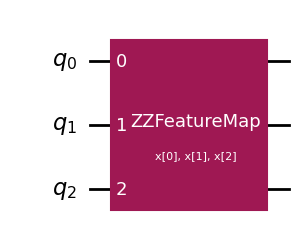

In [13]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import ZZFeatureMap
from qiskit.visualization import circuit_drawer

# Define the number of qubits and feature map parameters
num_qubits = 3
entanglement = 'linear'

# Create the ZZFeatureMap circuit
feature_map = ZZFeatureMap(feature_dimension=num_qubits, entanglement=entanglement)

# Build the circuit
circuit = feature_map.compose(QuantumCircuit(num_qubits))

# Plot the circuit
circuit_drawer(circuit, output='mpl')  # Generates a matplotlib-based diagram


In [15]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import ZZFeatureMap
from qiskit.visualization import circuit_drawer
import matplotlib.pyplot as plt

# Define the number of qubits and feature map parameters
num_qubits = 3
entanglement = 'linear'

# Create the ZZFeatureMap circuit
feature_map = ZZFeatureMap(feature_dimension=num_qubits, entanglement=entanglement)

# Build the circuit
circuit = feature_map.compose(QuantumCircuit(num_qubits))

# Generate the circuit diagram
fig = circuit_drawer(circuit, output='mpl')

# Save the figure with 300 dpi
fig.savefig('feature_map_circuit.png', dpi=300)


In [17]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import ZFeatureMap
from qiskit.visualization import circuit_drawer
import matplotlib.pyplot as plt

# Define the number of qubits for the ZFeatureMap
num_qubits = 3

# Create the ZFeatureMap circuit
feature_map = ZFeatureMap(feature_dimension=num_qubits)

# Build the circuit
circuit = feature_map.compose(QuantumCircuit(num_qubits))

# Generate the circuit diagram
fig = circuit_drawer(circuit, output='mpl')

# Save the figure with 300 dpi
fig.savefig('zfeature_map_circuit.png', dpi=300)

# Optional: Display the plot
plt.show()


In [18]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import ZFeatureMap, ZZFeatureMap
from qiskit.visualization import circuit_drawer
import matplotlib.pyplot as plt

# Parameters
num_qubits = 3

# Create ZFeatureMap
z_feature_map = ZFeatureMap(feature_dimension=num_qubits)
z_circuit = z_feature_map.compose(QuantumCircuit(num_qubits))

# Create ZZFeatureMap
zz_feature_map = ZZFeatureMap(feature_dimension=num_qubits, entanglement='linear')
zz_circuit = zz_feature_map.compose(QuantumCircuit(num_qubits))

# Draw and save ZFeatureMap circuit
z_fig = circuit_drawer(z_circuit, output='mpl')
z_fig.savefig('znfeature_map_circuit.png', dpi=300)

# Draw and save ZZFeatureMap circuit
zz_fig = circuit_drawer(zz_circuit, output='mpl')
zz_fig.savefig('zzfeature_map_circuit.png', dpi=300)

# Optional: Display the plots
plt.show()


In [19]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import ZFeatureMap, ZZFeatureMap
from qiskit.visualization import circuit_drawer
import matplotlib.pyplot as plt

# Number of qubits equals the number of features
num_qubits = 7

# Create ZFeatureMap with 7 qubits
z_feature_map = ZFeatureMap(feature_dimension=num_qubits)
z_circuit = z_feature_map.compose(QuantumCircuit(num_qubits))

# Create ZZFeatureMap with 7 qubits and linear entanglement
zz_feature_map = ZZFeatureMap(feature_dimension=num_qubits, entanglement='linear')
zz_circuit = zz_feature_map.compose(QuantumCircuit(num_qubits))

# Draw and save ZFeatureMap circuit
z_fig = circuit_drawer(z_circuit, output='mpl')
z_fig.savefig('zfeature_map_circuit_7_qubits.png', dpi=300)

# Draw and save ZZFeatureMap circuit
zz_fig = circuit_drawer(zz_circuit, output='mpl')
zz_fig.savefig('zzfeature_map_circuit_7_qubits.png', dpi=300)

# Optional: Display the plots
plt.show()


In [27]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import ZFeatureMap, ZZFeatureMap, PauliFeatureMap
from qiskit.visualization import circuit_drawer
import matplotlib.pyplot as plt

# Number of qubits equals the number of features
num_qubits = 7

# Create ZFeatureMap with 7 qubits
z_feature_map = ZFeatureMap(feature_dimension=num_qubits)
z_circuit = z_feature_map.compose(QuantumCircuit(num_qubits))

# Create ZZFeatureMap with 7 qubits and linear entanglement
zz_feature_map = ZZFeatureMap(feature_dimension=num_qubits, entanglement='linear')
zz_circuit = zz_feature_map.compose(QuantumCircuit(num_qubits))

# Create PauliFeatureMap with 7 qubits
pauli_feature_map = PauliFeatureMap(feature_dimension=num_qubits)
pauli_circuit = pauli_feature_map.compose(QuantumCircuit(num_qubits))

# Function to draw and save a single circuit diagram
def save_circuit_diagram(circuit, filename, title, description):
    fig, ax = plt.subplots(figsize=(10, 8))
    circuit_drawer(circuit, output='mpl', ax=ax)
    ax.set_title(title)
    ax.text(0.5, -0.2, description, fontsize=16, va='center', ha='center', bbox=dict(facecolor='white', alpha=0.7), transform=ax.transAxes)
    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.close()

# Save individual diagrams
save_circuit_diagram(z_circuit, 'ZFeatureMap_circuit.png', 'ZFeatureMap Circuit', 'ZFeatureMap:\nZ Rotations\n(no entanglement)')
save_circuit_diagram(zz_circuit, 'ZZFeatureMap_circuit.png', 'ZZFeatureMap Circuit', 'ZZFeatureMap:\nZ Rotations\n+ ZZ Entanglement')
save_circuit_diagram(pauli_circuit, 'PauliFeatureMap_circuit.png', 'PauliFeatureMap Circuit', 'PauliFeatureMap:\nPauli Rotations')


In [28]:
import numpy as np
from PIL import Image
import os

# Define the base directory
base_dir = 'data/CWT_6sec/'

# List of class directories
classes = ['class1', 'class2', 'class3', 'class4']

# Initialize lists to hold image data and labels
images = []
labels = []

# Loop through each class directory
for class_index, class_name in enumerate(classes):
    class_dir = os.path.join(base_dir, class_name)
    
    # Get list of all files in the class directory
    files = os.listdir(class_dir)
    
    # Filter out image files (assuming .png extension)
    image_files = [f for f in files if f.endswith('.png')]
    
    # Load and preprocess images
    for image_file in image_files:
        image_path = os.path.join(class_dir, image_file)
        img = Image.open(image_path).convert('RGB')  # Convert to RGB if needed
        img_array = np.array(img)  # Convert image to array
        
        images.append(img_array)
        labels.append(class_index)  # Class index for labeling

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

print(f'Loaded {len(images)} images with shape {images[0].shape}')


Loaded 2522 images with shape (1110, 2310, 3)


In [34]:
import numpy as np
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from skimage.feature import hog
from skimage.color import rgb2gray

# Directory containing the data
base_dir = 'data/CWT_6sec/'
classes = ['class1', 'class2', 'class3', 'class4']

# Define desired image size
image_size = (64, 64)  # Adjust size as needed

# Initialize lists to hold image data and labels
images = []
labels = []

# Loop through each class directory
for class_index, class_name in enumerate(classes):
    class_dir = os.path.join(base_dir, class_name)
    files = os.listdir(class_dir)
    image_files = [f for f in files if f.endswith('.png')]
    
    for image_file in image_files:
        image_path = os.path.join(class_dir, image_file)
        img = Image.open(image_path).convert('RGB')
        img = img.resize(image_size)
        img_array = np.array(img)
        
        # Convert image to grayscale
        img_gray = rgb2gray(img_array)
        
        # Extract HOG features
        features, _ = hog(img_gray, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=True, feature_vector=True)
        
        images.append(features)
        labels.append(class_index)

# Convert lists to numpy arrays
X = np.array(images)
y = np.array(labels)

# Normalize feature matrix
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=50)  # Adjust the number of components as needed
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)  # Transform test data with the same PCA

# Define and train SVM model
svm_model = SVC(kernel='linear', class_weight='balanced')
svm_model.fit(X_train_reduced, y_train)

# Predict with SVM
svm_predicted_labels = svm_model.predict(X_test_reduced)

# Evaluate SVM model
svm_accuracy = accuracy_score(y_test, svm_predicted_labels)
svm_report = classification_report(y_test, svm_predicted_labels)

print(f'SVM Accuracy: {svm_accuracy * 100:.2f}%')
print(f'SVM Classification Report:\n{svm_report}')


SVM Accuracy: 24.75%
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.20      0.21       127
           1       0.25      0.18      0.21       114
           2       0.26      0.32      0.29       136
           3       0.26      0.28      0.27       128

    accuracy                           0.25       505
   macro avg       0.25      0.24      0.24       505
weighted avg       0.25      0.25      0.24       505



In [35]:
import numpy as np
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from skimage.feature import hog
from skimage.color import rgb2gray

# Placeholder for QGA implementation
class QuantumGeneticAlgorithm:
    def __init__(self, population_size=20, generations=10):
        self.population_size = population_size
        self.generations = generations

    def fit(self, X, y):
        # Placeholder: Implement QGA logic for feature selection
        # For demonstration purposes, we return all features
        num_features = X.shape[1]
        return np.arange(num_features)  # Return all features for now

# Directory containing the data
base_dir = 'data/CWT_6sec/'
classes = ['class1', 'class2', 'class3', 'class4']

# Define desired image size
image_size = (64, 64)  # Adjust size as needed

# Initialize lists to hold image data and labels
images = []
labels = []

# Loop through each class directory
for class_index, class_name in enumerate(classes):
    class_dir = os.path.join(base_dir, class_name)
    files = os.listdir(class_dir)
    image_files = [f for f in files if f.endswith('.png')]
    
    for image_file in image_files:
        image_path = os.path.join(class_dir, image_file)
        img = Image.open(image_path).convert('RGB')
        img = img.resize(image_size)
        img_array = np.array(img)
        
        # Convert image to grayscale
        img_gray = rgb2gray(img_array)
        
        # Extract HOG features
        features, _ = hog(img_gray, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=True, feature_vector=True)
        
        images.append(features)
        labels.append(class_index)

# Convert lists to numpy arrays
X = np.array(images)
y = np.array(labels)

# Normalize feature matrix
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=50)  # Adjust the number of components as needed
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)  # Transform test data with the same PCA

# Apply QGA for feature selection
qga = QuantumGeneticAlgorithm(population_size=20, generations=10)
selected_features_indices_qga = qga.fit(X_train_reduced, y_train)

# Select features
X_train_reduced_selected = X_train_reduced[:, selected_features_indices_qga]
X_test_reduced_selected = X_test_reduced[:, selected_features_indices_qga]

# Define and train SVM model
svm_model = SVC(kernel='linear', class_weight='balanced')
svm_model.fit(X_train_reduced_selected, y_train)

# Predict with SVM
svm_predicted_labels = svm_model.predict(X_test_reduced_selected)

# Evaluate SVM model
svm_accuracy = accuracy_score(y_test, svm_predicted_labels)
svm_report = classification_report(y_test, svm_predicted_labels)

print(f'SVM Accuracy: {svm_accuracy * 100:.2f}%')
print(f'SVM Classification Report:\n{svm_report}')


SVM Accuracy: 24.95%
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.26      0.27       127
           1       0.24      0.25      0.24       114
           2       0.26      0.26      0.26       136
           3       0.23      0.23      0.23       128

    accuracy                           0.25       505
   macro avg       0.25      0.25      0.25       505
weighted avg       0.25      0.25      0.25       505



In [37]:
import numpy as np
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from skimage.feature import hog
from skimage.color import rgb2gray

# Placeholder for QGA implementation
class QuantumGeneticAlgorithm:
    def __init__(self, population_size=20, generations=10, mutation_rate=0.1):
        self.population_size = population_size
        self.generations = generations
        self.mutation_rate = mutation_rate

    def initialize_population(self, num_features):
        return np.random.randint(0, 2, size=(self.population_size, num_features))

    def evaluate_fitness(self, X, y, population):
        fitness_scores = np.zeros(self.population_size)
        for i in range(self.population_size):
            selected_features = population[i] == 1
            if np.sum(selected_features) == 0:
                fitness_scores[i] = 0
            else:
                X_selected = X[:, selected_features]
                X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
                svm_model = SVC(kernel='linear', class_weight='balanced')
                svm_model.fit(X_train, y_train)
                predictions = svm_model.predict(X_test)
                fitness_scores[i] = accuracy_score(y_test, predictions)
        return fitness_scores

    def select_parents(self, population, fitness_scores):
        selected_indices = np.argsort(fitness_scores)[-self.population_size // 2:]
        return population[selected_indices]

    def crossover(self, parents):
        offspring = []
        for _ in range(self.population_size - parents.shape[0]):
            parent1, parent2 = parents[np.random.choice(parents.shape[0], 2, replace=False)]
            crossover_point = np.random.randint(0, len(parent1))
            child = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
            offspring.append(child)
        return np.vstack((parents, np.array(offspring)))

    def mutate(self, population):
        for i in range(self.population_size):
            if np.random.rand() < self.mutation_rate:
                mutation_point = np.random.randint(0, population.shape[1])
                population[i, mutation_point] = 1 - population[i, mutation_point]
        return population

    def fit(self, X, y):
        num_features = X.shape[1]
        population = self.initialize_population(num_features)
        for generation in range(self.generations):
            fitness_scores = self.evaluate_fitness(X, y, population)
            parents = self.select_parents(population, fitness_scores)
            population = self.crossover(parents)
            population = self.mutate(population)
        best_index = np.argmax(fitness_scores)
        return population[best_index]

# Directory containing the data
base_dir = 'data/CWT_6sec/'
classes = ['class1', 'class2', 'class3', 'class4']

# Define desired image size
image_size = (64, 64)  # Adjust size as needed

# Initialize lists to hold image data and labels
images = []
labels = []

# Loop through each class directory
for class_index, class_name in enumerate(classes):
    class_dir = os.path.join(base_dir, class_name)
    files = os.listdir(class_dir)
    image_files = [f for f in files if f.endswith('.png')]
    
    for image_file in image_files:
        image_path = os.path.join(class_dir, image_file)
        img = Image.open(image_path).convert('RGB')
        img = img.resize(image_size)
        img_array = np.array(img)
        
        # Convert image to grayscale
        img_gray = rgb2gray(img_array)
        
        # Extract HOG features
        features, _ = hog(img_gray, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=True, feature_vector=True)
        
        images.append(features)
        labels.append(class_index)

# Convert lists to numpy arrays
X = np.array(images)
y = np.array(labels)

# Normalize feature matrix
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=150)  # Adjust the number of components as needed
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)  # Transform test data with the same PCA

# Apply QGA for feature selection
qga = QuantumGeneticAlgorithm(population_size=20, generations=10, mutation_rate=0.1)
selected_features_indices_qga = qga.fit(X_train_reduced, y_train)

# Select features
X_train_reduced_selected = X_train_reduced[:, selected_features_indices_qga == 1]
X_test_reduced_selected = X_test_reduced[:, selected_features_indices_qga == 1]

# Define and train SVM model
svm_model = SVC(kernel='linear', class_weight='balanced')
svm_model.fit(X_train_reduced_selected, y_train)

# Predict with SVM
svm_predicted_labels = svm_model.predict(X_test_reduced_selected)

# Evaluate SVM model
svm_accuracy = accuracy_score(y_test, svm_predicted_labels)
svm_report = classification_report(y_test, svm_predicted_labels)

print(f'SVM Accuracy: {svm_accuracy * 100:.2f}%')
print(f'SVM Classification Report:\n{svm_report}')


SVM Accuracy: 23.96%
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.27      0.25       127
           1       0.20      0.24      0.22       114
           2       0.25      0.21      0.23       136
           3       0.28      0.24      0.26       128

    accuracy                           0.24       505
   macro avg       0.24      0.24      0.24       505
weighted avg       0.24      0.24      0.24       505



In [ ]:
import numpy as np
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from skimage.feature import hog
from skimage.color import rgb2gray
from qiskit.circuit.library import ZZFeatureMap
from qiskit_aer import AerSimulator
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import FidelityQuantumKernel

class QuantumGeneticAlgorithm:
    def __init__(self, population_size=20, generations=10, mutation_rate=0.1):
        self.population_size = population_size
        self.generations = generations
        self.mutation_rate = mutation_rate

    def initialize_population(self, num_features):
        return np.random.randint(0, 2, size=(self.population_size, num_features))

    def evaluate_fitness(self, X, y, population):
        fitness_scores = np.zeros(self.population_size)
        for i in range(self.population_size):
            selected_features = population[i] == 1
            if np.sum(selected_features) == 0:
                fitness_scores[i] = 0
            else:
                X_selected = X[:, selected_features]
                X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
                svm_model = SVC(kernel='linear', class_weight='balanced')
                svm_model.fit(X_train, y_train)
                predictions = svm_model.predict(X_test)
                fitness_scores[i] = accuracy_score(y_test, predictions)
        return fitness_scores

    def select_parents(self, population, fitness_scores):
        selected_indices = np.argsort(fitness_scores)[-self.population_size // 2:]
        return population[selected_indices]

    def crossover(self, parents):
        offspring = []
        for _ in range(self.population_size - parents.shape[0]):
            parent1, parent2 = parents[np.random.choice(parents.shape[0], 2, replace=False)]
            crossover_point = np.random.randint(0, len(parent1))
            child = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
            offspring.append(child)
        return np.vstack((parents, np.array(offspring)))

    def mutate(self, population):
        for i in range(self.population_size):
            if np.random.rand() < self.mutation_rate:
                mutation_point = np.random.randint(0, population.shape[1])
                population[i, mutation_point] = 1 - population[i, mutation_point]
        return population

    def fit(self, X, y):
        num_features = X.shape[1]
        population = self.initialize_population(num_features)
        for generation in range(self.generations):
            fitness_scores = self.evaluate_fitness(X, y, population)
            parents = self.select_parents(population, fitness_scores)
            population = self.crossover(parents)
            population = self.mutate(population)
        best_index = np.argmax(fitness_scores)
        return population[best_index]

# Directory containing the data
base_dir = 'data/CWT_6sec/'
classes = ['class1', 'class2', 'class3', 'class4']

# Define desired image size
image_size = (64, 64)  # Adjust size as needed

# Initialize lists to hold image data and labels
images = []
labels = []

# Loop through each class directory
for class_index, class_name in enumerate(classes):
    class_dir = os.path.join(base_dir, class_name)
    files = os.listdir(class_dir)
    image_files = [f for f in files if f.endswith('.png')]
    
    for image_file in image_files:
        image_path = os.path.join(class_dir, image_file)
        img = Image.open(image_path).convert('RGB')
        img = img.resize(image_size)
        img_array = np.array(img)
        
        # Convert image to grayscale
        img_gray = rgb2gray(img_array)
        
        # Extract HOG features
        features, _ = hog(img_gray, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=True, feature_vector=True)
        
        images.append(features)
        labels.append(class_index)

# Convert lists to numpy arrays
X = np.array(images)
y = np.array(labels)

# Normalize feature matrix
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95)  # Preserve 95% of variance
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)  # Transform test data with the same PCA

# Apply QGA for feature selection
qga = QuantumGeneticAlgorithm(population_size=20, generations=10, mutation_rate=0.1)
selected_features_indices_qga = qga.fit(X_train_reduced, y_train)

# Select features
X_train_reduced_selected = X_train_reduced[:, selected_features_indices_qga == 1]
X_test_reduced_selected = X_test_reduced[:, selected_features_indices_qga == 1]

# Define quantum feature map
feature_map = ZZFeatureMap(feature_dimension=X_train_reduced_selected.shape[1], entanglement='linear')

# Initialize the quantum backend
simulator = AerSimulator()

# Define the quantum kernel
quantum_kernel = FidelityQuantumKernel(feature_map=feature_map, quantum_instance=simulator)

# Initialize QSVC
qsvc = QSVC(quantum_kernel=quantum_kernel)

# Train the QSVC
qsvc.fit(X_train_reduced_selected, y_train)

# Predict on test data
qsvc_predicted_labels = qsvc.predict(X_test_reduced_selected)

# Evaluate QSVC model
qsvc_accuracy = accuracy_score(y_test, qsvc_predicted_labels)
qsvc_report = classification_report(y_test, qsvc_predicted_labels)

print(f'QSVC Accuracy: {qsvc_accuracy * 100:.2f}%')
print(f'QSVC Classification Report:\n{qsvc_report}')
